In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('/content/drive/My Drive/Dataset/tesla.csv', date_parser=True)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
data_train = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()                                  

In [6]:
training_data = data_train.drop(['Date', 'Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
66,20.690001,20.750000,20.309999,20.600000,597700
67,20.430000,21.170000,20.299999,20.990000,643600
68,21.150000,21.280001,21.010000,21.120001,332000
69,21.059999,21.260000,20.320000,20.459999,313400
70,20.570000,20.639999,20.340000,20.430000,141000


In [7]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = []
y_train = []

for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])

In [8]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((660, 60, 5), (660,))

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [10]:
regression = Sequential()

regression.add(LSTM(units = 60, activation='relu', return_sequences=True, input_shape= (X_train.shape[1], 5)))
regression.add(Dropout(0.20))

regression.add(LSTM(units = 60, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 80, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 120, activation='relu'))
regression.add(Dropout(0.2))

regression.add(Dense(units = 1))

In [11]:
regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [12]:
regression.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
regression.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
21/21 [==============================] - 3s 145ms/step - loss: 0.1169
Epoch 2/50
21/21 [==============================] - 3s 144ms/step - loss: 0.0246
Epoch 3/50
21/21 [==============================] - 3s 145ms/step - loss: 0.0136
Epoch 4/50
21/21 [==============================] - 3s 145ms/step - loss: 0.0134
Epoch 5/50
21/21 [==============================] - 3s 147ms/step - loss: 0.0115
Epoch 6/50
21/21 [==============================] - 3s 147ms/step - loss: 0.0102
Epoch 7/50
21/21 [==============================] - 3s 144ms/step - loss: 0.0096
Epoch 8/50
21/21 [==============================] - 3s 146ms/step - loss: 0.0089
Epoch 9/50
21/21 [==============================] - 3s 148ms/step - loss: 0.0071
Epoch 10/50
21/21 [==============================] - 3s 145ms/step - loss: 0.0078
Epoch 11/50
21/21 [==============================] - 3s 145ms/step - loss: 0.0078
Epoch 12/50
21/21 [==============================] - 3s 145ms/step - loss: 0.0066
Epoch 13/50
21/21 [======

In [14]:
data_test.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [15]:
past_60_days = data_train.tail(60)

df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(['Date','Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,188.250000,188.529999,181.000000,181.880005,5126400
1,182.880005,184.880005,180.000000,181.470001,4042300
2,182.509995,188.889999,182.509995,186.800003,4072200
3,185.520004,186.580002,182.679993,185.850006,3391600
4,186.149994,193.399994,185.000000,193.149994,5461900
...,...,...,...,...,...
1027,244.820007,246.850006,242.779999,246.169998,3010700
1028,246.110001,258.119995,246.020004,258.000000,7575500
1029,257.000000,261.000000,254.270004,255.729996,4816600
1030,262.399994,265.750000,259.059998,262.049988,7100400


In [16]:
inputs = scaler.transform(df)

X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((972, 60, 5), (972,))

In [17]:
y_pred = regression.predict(X_test)

In [18]:
scaler.scale_

array([3.84393622e-03, 3.74377578e-03, 3.86682672e-03, 3.83244531e-03,
       3.07095126e-08])

In [19]:
scale = 1/8.18605127e-04

y_pred = y_pred*scale
y_test = y_test*scale


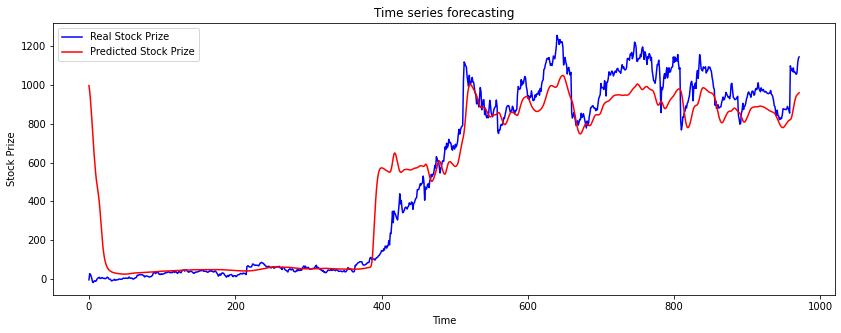

In [20]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'blue', label = 'Real Stock Prize')
plt.plot(y_pred, color='red', label = 'Predicted Stock Prize')
plt.title('Time series forecasting')
plt.xlabel('Time')
plt.ylabel('Stock Prize')
plt.legend()
plt.show()